In [1]:
import scanpy as sc
import scFates as scf

In [2]:
sc.set_figure_params()

In [3]:
adata=sc.read("data/adata_tree.h5ad")

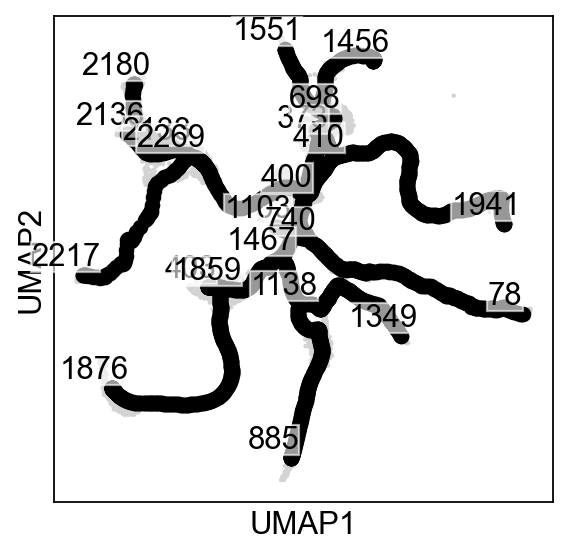

In [4]:
scf.pl.graph(adata)

In [5]:
scf.tl.subset_tree(adata,root_milestone="SCP-Hub",milestones=["enFib","mSC","nmSC"])

subsetting tree
node 135 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:01) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.
    finished (0:00:00) --> tree extracted
--> added 
    .obs['old_milestones'], previous milestones from intial tree


In [6]:
scf.tl.tree(adata,Nodes=800,method="ppt",device="gpu",seed=100,
            use_rep="X_umap",ppt_sigma=.4,ppt_lambda=200,ppt_nsteps=100)

inferring a principal tree inferring a principal tree --> parameters used 
    800 principal points, sigma = 0.4, lambda = 200, metric = euclidean
    fitting:   7%|▋         | 7/100 [00:02<00:37,  2.49it/s]
    converged
    finished (0:00:07) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


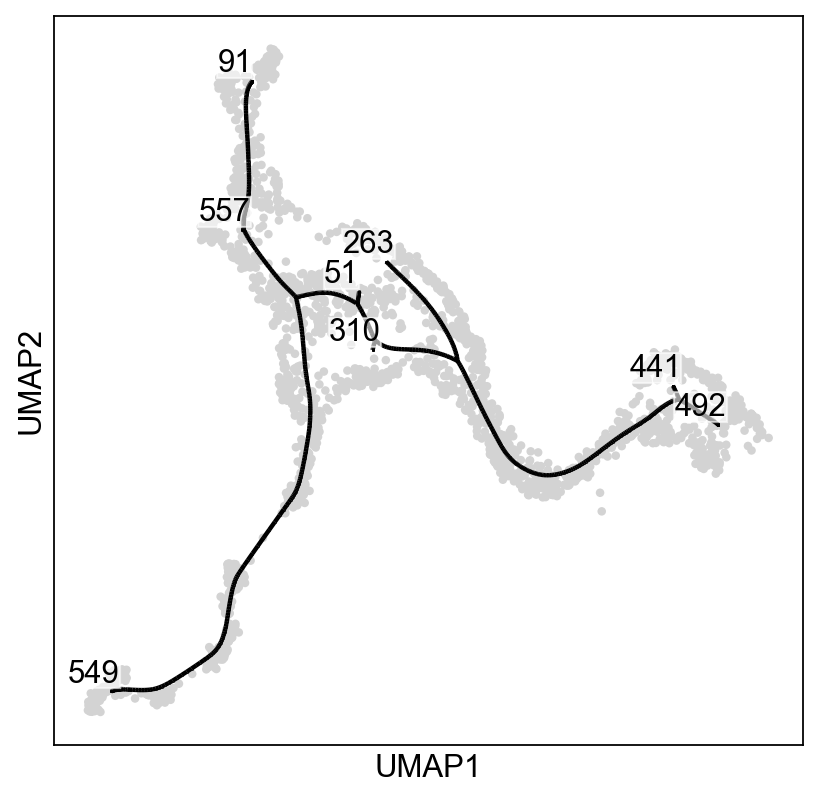

In [7]:
sc.set_figure_params(figsize=(6,6))
scf.pl.graph(adata,size_nodes=.1,forks=False)

In [8]:
scf.tl.cleanup(adata,leaves=[51,310,441])

    graph cleaned --> removed 57 principal points


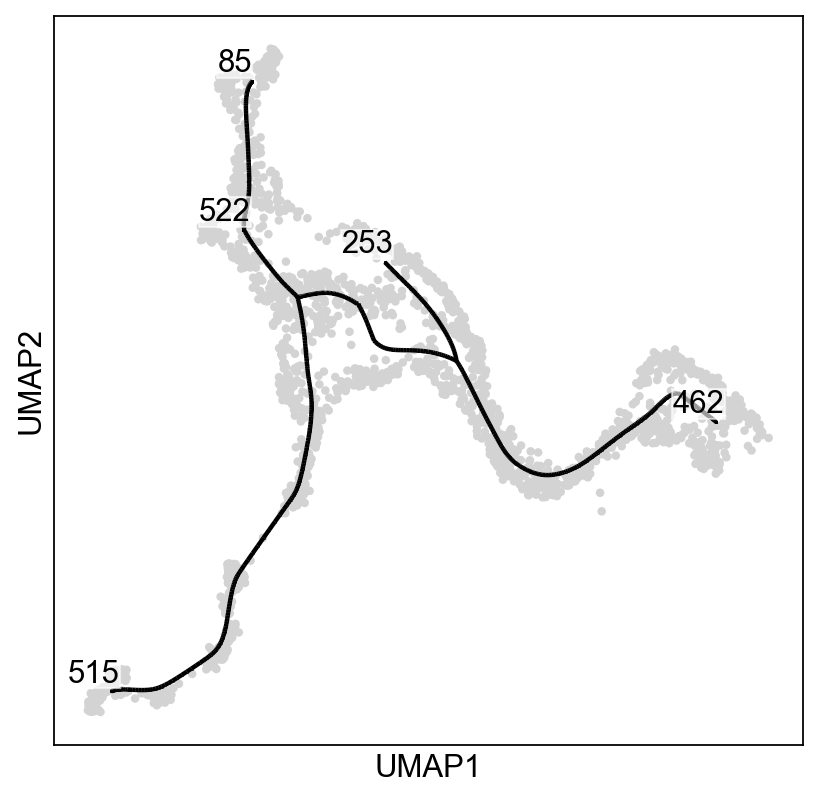

In [9]:
scf.pl.graph(adata,size_nodes=.1,forks=False)

In [10]:
scf.tl.root(adata,462)

node 462 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [11]:
scf.tl.pseudotime(adata)

projecting cells onto the principal graph
    finished (0:00:02) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


In [12]:
scf.tl.test_association(adata,n_jobs=40,A_cut=.5)

test features for association with the trajectory
    single mapping : 100%|██████████| 21676/21676 [02:36<00:00, 138.79it/s]
    found 9222 significant features (0:02:36) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


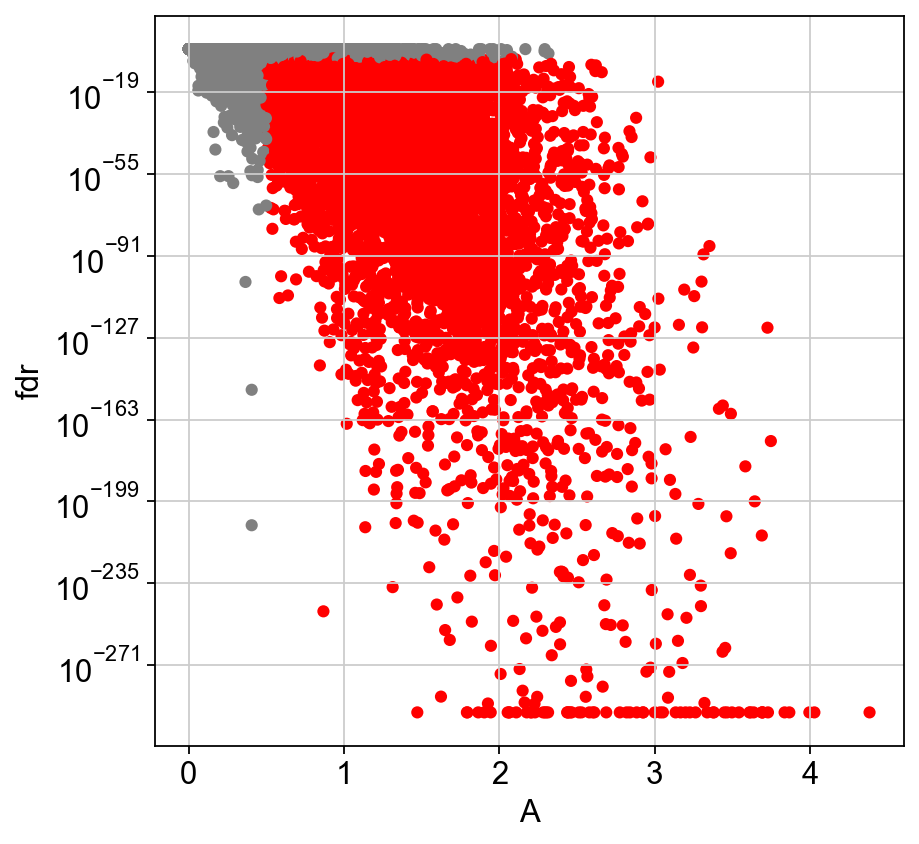

In [13]:
scf.pl.test_association(adata)

In [14]:
scf.tl.fit(adata,n_jobs=40)

fit features associated with the trajectory
    single mapping : 100%|██████████| 9222/9222 [02:14<00:00, 68.40it/s]
    finished (adata subsetted to keep only fitted features!) (0:02:24) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


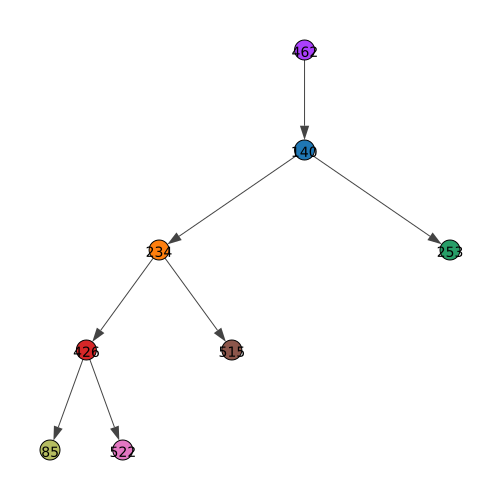

In [15]:
scf.pl.milestones(adata)

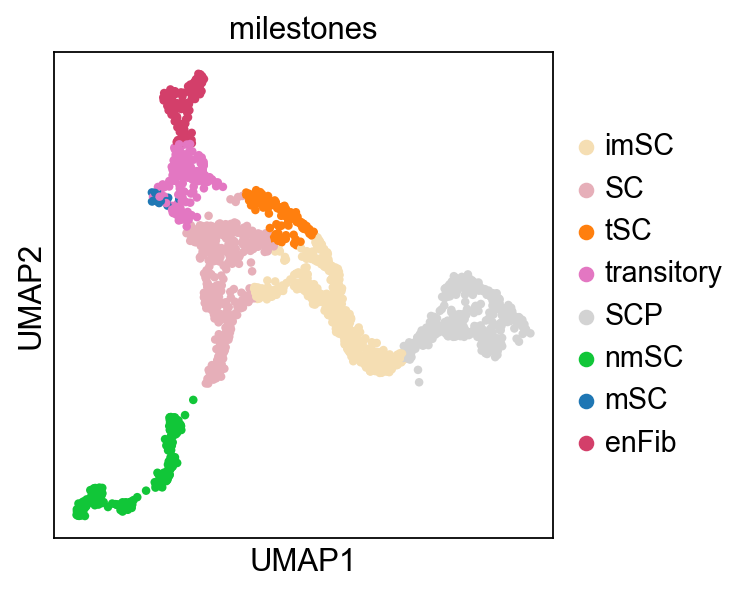

In [16]:
sc.set_figure_params()
scf.tl.rename_milestones(adata,["imSC","SC","tSC","transitory","SCP","nmSC","mSC","enFib"])
sc.pl.umap(adata,color="milestones",palette=['wheat','#e6afb9','tab:orange','tab:pink','lightgrey','#11c638','tab:blue','#d33f6a'])

In [17]:
scf.tl.dendrogram(adata,crowdedness=.01)

Generating dendrogram of tree
    segment : 100%|██████████| 7/7 [00:00<00:00, 16.39it/s]
    finished (0:00:00) --> added 
    .obsm['X_dendro'], new embedding generated.
    .uns['dendro_segments'] tree segments used for plotting.


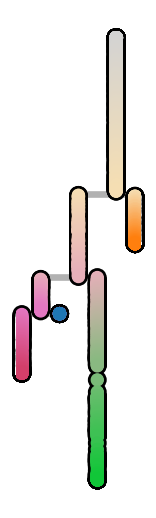

In [18]:
sc.set_figure_params(figsize=(1,4))
scf.pl.dendrogram(adata,color_milestones=True,s=100,frameon=False,add_outline=True,clip_on=False,tree_behind=True)

In [19]:
r="SCP"
m=["enFib","mSC","nmSC"]
scf.tl.test_fork(adata,r,m,rescale=True,n_jobs=20)

testing fork
    single mapping


/home/lfaure/scFates/scFates/tools/bifurcation_tools.py:157: FutureWarning: In a future version of pandas all arguments of Index.drop_duplicates will be keyword-only
  brcells = brcells.loc[brcells.index.drop_duplicates(False)]


    Differential expression: 100%|██████████| 9222/9222 [01:12<00:00, 126.72it/s]
    test for upregulation for each leave vs root
    upreg nmSC: 100%|██████████| 1264/1264 [00:00<00:00, 1469.60it/s]
    finished (0:01:20) --> added 
    .uns['SCP->enFib<>mSC<>nmSC']['fork'], DataFrame with fork test results.


In [20]:
scf.tl.branch_specific(adata,r,m,effect=.5)

    branch specific features: enFib: 197, mSC: 70, nmSC: 68
    finished --> updated 
    .uns['SCP->enFib<>mSC<>nmSC']['fork'], DataFrame updated with additionnal 'branch' column.


In [21]:
scf.tl.activation(adata,r,m,n_jobs=20,pseudotime_offset=-0.0001,nwin=5,deriv_cut=.3)

testing activation
    to nmSC: 100%|██████████| 68/68 [00:00<00:00, 75.08it/s]
    threshold pseudotime is: 10.629223954077439
    180 early and 17 late features specific to leave enFib
    66 early and 4 late features specific to leave mSC
    49 early and 19 late features specific to leave nmSC
    finished (0:00:03) --> updated 
    .uns['SCP->enFib<>mSC<>nmSC']['fork'], DataFrame updated with additionnal 'activation' and 'module' columns.


In [22]:
scf.get.fork_stats(adata,r,m,module="early",branch="mSC")

,enFib,nmSC,mSC,de_p,fdr,signi_p,signi_fdr,up_A,up_p,branch,activation,module
Mpz,-1.435111,-2.796767,0.0,5.991123e-71,5.525013e-67,1.0,1.0,0.076708,6.642629e-24,mSC,10.038439,early
Itih5,-0.565449,-1.678744,0.0,5.318659e-44,4.904867e-40,1.0,1.0,0.227467,1.873799e-119,mSC,8.569399,early
Prkcq,-0.551340,-0.738245,0.0,1.442903e-07,1.330645e-03,1.0,1.0,0.062351,2.875883e-18,mSC,10.528119,early
Cd82,-0.930028,-1.310957,0.0,8.726006e-10,8.047122e-06,1.0,1.0,0.065616,8.841368e-16,mSC,10.528119,early
Bcas1,-1.532149,-2.007487,0.0,1.322745e-18,1.219835e-14,1.0,1.0,0.078722,1.130017e-33,mSC,10.038439,early
...,...,...,...,...,...,...,...,...,...,...,...,...
Ostf1,-0.598874,-0.942698,0.0,7.897441e-08,7.283020e-04,1.0,1.0,0.019271,1.511396e-02,mSC,8.079719,early
Trpm3,-0.634022,-0.957428,0.0,2.715197e-08,2.503954e-04,1.0,1.0,0.047737,3.147662e-10,mSC,1.713880,early
4930506M07Rik,-1.412354,-2.066284,0.0,2.415394e-33,2.227477e-29,1.0,1.0,0.095394,5.795638e-69,mSC,10.038439,early
Arhgap19,-2.466765,-2.907202,0.0,4.520399e-18,4.168712e-14,1.0,1.0,0.052097,1.465158e-11,mSC,10.528119,early


In [23]:
adata.write("data/adata_glia_focus.h5ad")